In [1]:
import pandas as pd
import numpy as np
import os

In [4]:
# Load csv
df = pd.read_csv('../data/metadata.csv')

# Get segmented images
segmented = os.listdir('../data/segmented')
segmented = [x for x in segmented if "mask" not in x]

# Get not segmented images
not_segmented = os.listdir('../data/not_segmented')

# Get all
all_images = segmented + not_segmented

In [5]:
def segmented_distribution():
    categories = {
        'BCC': [],
        'MEL': [],
        'SEK': [],
        'SCC': [],
        'ACK': [],
        'NEV': [],
    }

    for file in segmented:
        category = df.loc[df['img_id'] == file]['diagnostic'].values[0]
        categories[category].append(file)

    return categories

def not_segmented_distribution():
    categories = {
        'BCC': [],
        'MEL': [],
        'SEK': [],
        'SCC': [],
        'ACK': [],
        'NEV': [],
    }

    for file in not_segmented:
        category = df.loc[df['img_id'] == file]['diagnostic'].values[0]
        categories[category].append(file)

    return categories

def all_distribution():
    categories = {
        'BCC': [],
        'MEL': [],
        'SEK': [],
        'SCC': [],
        'ACK': [],
        'NEV': [],
    }

    for file in all_images:
        category = df.loc[df['img_id'] == file]['diagnostic'].values[0]
        categories[category].append(file)

    return categories

In [11]:
def has_cancer(cat):
    return cat in ['BCC', 'MEL', 'SCC']

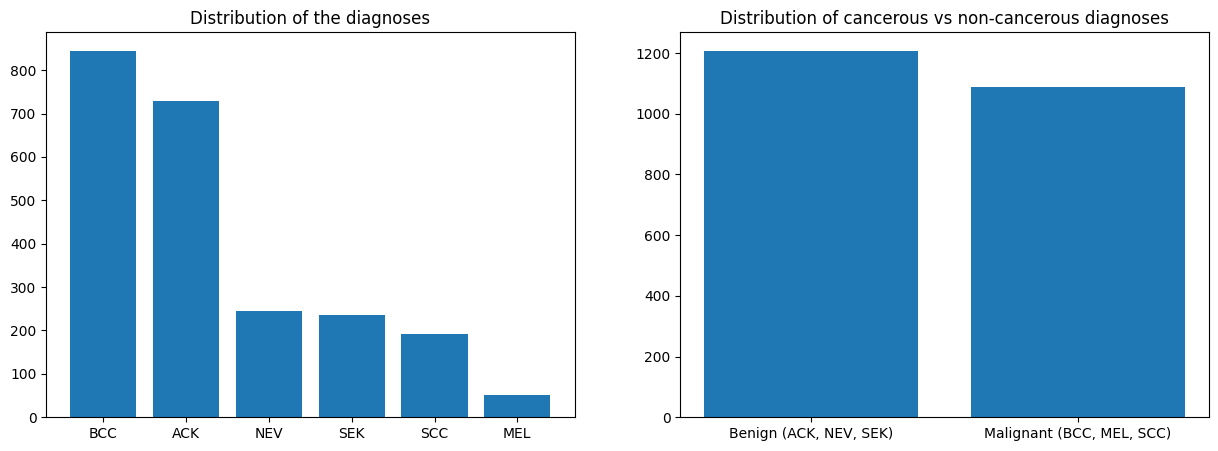

In [17]:
import matplotlib.pyplot as plt

dist = all_distribution()
dic = { k: len(v) for k, v in dist.items() }
dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}

# Split into 2 groups, cancer and not cancer
cancer = sum([ v for k, v in dic.items() if has_cancer(k) ])
not_cancer = sum([ v for k, v in dic.items() if not has_cancer(k) ])

# Plot dic and cancer side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.bar(dic.keys(), dic.values())
ax1.set_title('Distribution of the diagnoses')
ax2.bar(['Benign (ACK, NEV, SEK)', 'Malignant (BCC, MEL, SCC)'], [not_cancer, cancer])
ax2.set_title('Distribution of cancerous vs non-cancerous diagnoses')
plt.show()


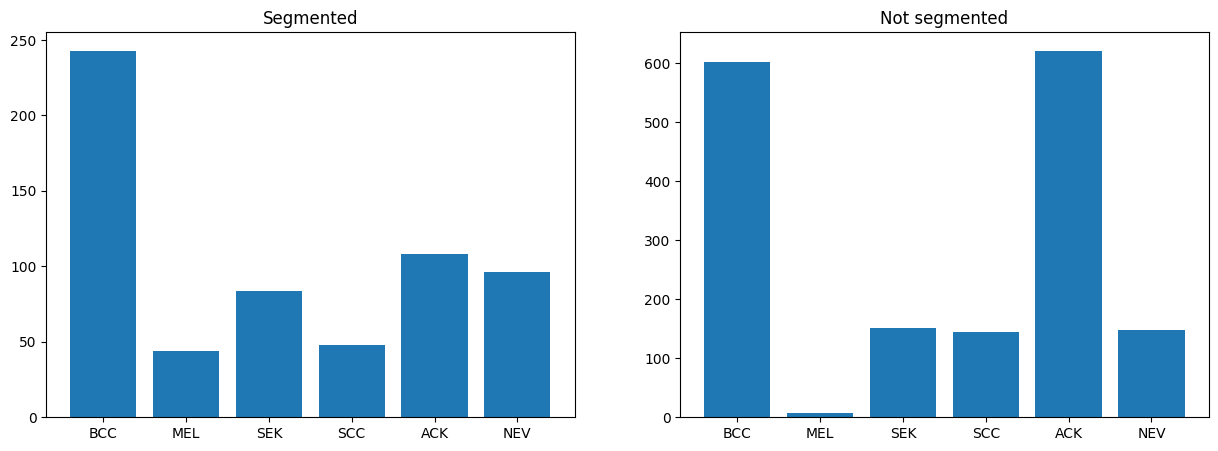

In [4]:
import matplotlib.pyplot as plt

segmented_dict_or = segmented_distribution()
not_segmented_dict_or = not_segmented_distribution()
segmented_dict = { k: len(v) for k, v in segmented_dict_or.items() }
not_segmented_dict = { k: len(v) for k, v in not_segmented_dict_or.items() }

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# Plot them on the same scale
ax[0].bar(segmented_dict.keys(), segmented_dict.values())
ax[1].bar(not_segmented_dict.keys(), not_segmented_dict.values())

ax[0].set_title('Segmented')
ax[1].set_title('Not segmented')

plt.show()

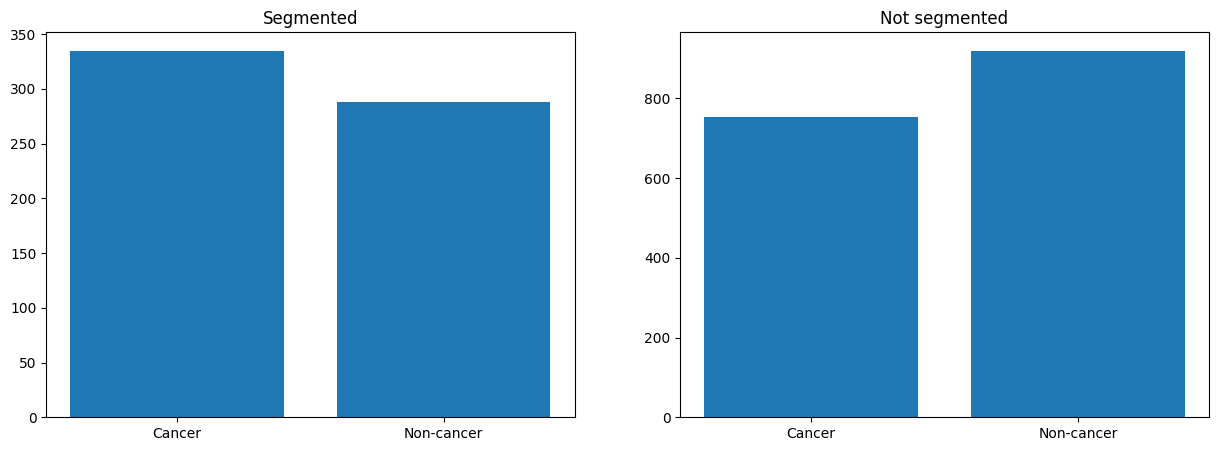

Segmented cancer: 335
Segmented non-cancer: 288
Not segmented cancer: 754
Not segmented non-cancer: 920


In [9]:
# Get distribution of cancer vs non-cancer
segmented_cancer_count = 0
segmented_non_cancer_count = 0
for cat, count in segmented_dict.items():
    if has_cancer(cat):
        segmented_cancer_count += count
    else:
        segmented_non_cancer_count += count

not_segmented_cancer_count = 0
not_segmented_non_cancer_count = 0
for cat, count in not_segmented_dict.items():
    if has_cancer(cat):
        not_segmented_cancer_count += count
    else:
        not_segmented_non_cancer_count += count

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# Plot them on the same scale
ax[0].bar(['Cancer', 'Non-cancer'], [segmented_cancer_count, segmented_non_cancer_count])
ax[1].bar(['Cancer', 'Non-cancer'], [not_segmented_cancer_count, not_segmented_non_cancer_count])

ax[0].set_title('Segmented')
ax[1].set_title('Not segmented')

plt.show()

print(f"Segmented cancer: {segmented_cancer_count}")
print(f"Segmented non-cancer: {segmented_non_cancer_count}")
print(f"Not segmented cancer: {not_segmented_cancer_count}")
print(f"Not segmented non-cancer: {not_segmented_non_cancer_count}")

In [6]:
print(segmented_dict_or['MEL'][2])
print(segmented_dict_or['MEL'][16])
print(segmented_dict_or['BCC'][10])
print(segmented_dict_or['BCC'][25])
print(segmented_dict_or['SCC'][5])
print(segmented_dict_or['NEV'][18])
print(segmented_dict_or['SEK'][37])
print(segmented_dict_or['SEK'][30])
print(segmented_dict_or['ACK'][43])
print(segmented_dict_or['ACK'][26])


PAT_115_1138_870.png
PAT_495_941_26.png
PAT_115_177_575.png
PAT_135_202_593.png
PAT_155_240_211.png
PAT_1298_1050_519.png
PAT_1439_1522_211.png
PAT_1415_1437_743.png
PAT_1481_1674_735.png
PAT_1414_1433_570.png
